In [1]:
import pandas as pd
import numpy as np

In [3]:
data=pd.read_csv("Facebook.csv")

In [5]:
data

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98998,1268299,68,4,1945,4,female,541.0,2118,341,3996,18089,3505,11887,491,6202
98999,1256153,18,12,1995,3,female,21.0,1968,1720,4401,13412,4399,10592,2,2820
99000,1195943,15,10,1998,5,female,111.0,2002,1524,11959,12554,11959,11462,0,1092
99001,1468023,23,11,1990,4,female,416.0,2560,185,4506,6516,4506,5760,0,756


#EDA-Exploratary data analysis

Answer - 1

In [14]:
#we have object,float data type and convert categorical gender data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99003 entries, 0 to 99002
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   userid                 99003 non-null  int64  
 1   age                    99003 non-null  int64  
 2   dob_day                99003 non-null  int64  
 3   dob_year               99003 non-null  int64  
 4   dob_month              99003 non-null  int64  
 5   gender                 98828 non-null  object 
 6   tenure                 99001 non-null  float64
 7   friend_count           99003 non-null  int64  
 8   friendships_initiated  99003 non-null  int64  
 9   likes                  99003 non-null  int64  
 10  likes_received         99003 non-null  int64  
 11  mobile_likes           99003 non-null  int64  
 12  mobile_likes_received  99003 non-null  int64  
 13  www_likes              99003 non-null  int64  
 14  www_likes_received     99003 non-null  int64  
dtypes:

In [4]:
# finding null values 
data.isnull().sum()

userid                     0
age                        0
dob_day                    0
dob_year                   0
dob_month                  0
gender                   175
tenure                     2
friend_count               0
friendships_initiated      0
likes                      0
likes_received             0
mobile_likes               0
mobile_likes_received      0
www_likes                  0
www_likes_received         0
dtype: int64

In [20]:
data['gender'].mode()

0    male
dtype: object

In [24]:
data['tenure'].mean()

537.8873748750012

In [21]:
# there are 175 null values in gender which needs to be replaced
# there are 2 null values which needs to be replaced which mean value
data['gender']=data['gender'].replace(np.nan,'male')

In [25]:
data['tenure']=data['tenure'].replace(np.nan,537.88)

In [27]:
data.isnull().sum()

userid                   0
age                      0
dob_day                  0
dob_year                 0
dob_month                0
gender                   0
tenure                   0
friend_count             0
friendships_initiated    0
likes                    0
likes_received           0
mobile_likes             0
mobile_likes_received    0
www_likes                0
www_likes_received       0
dtype: int64

Answer-2

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

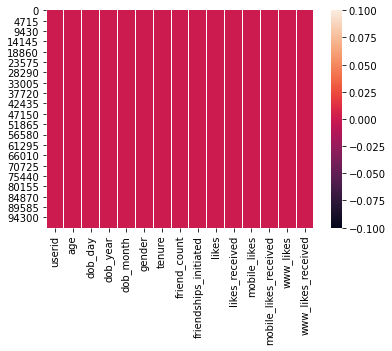

In [30]:
# From this heatmap we can observe that there are no Null values which are replaced 
sns.heatmap(data.isnull())

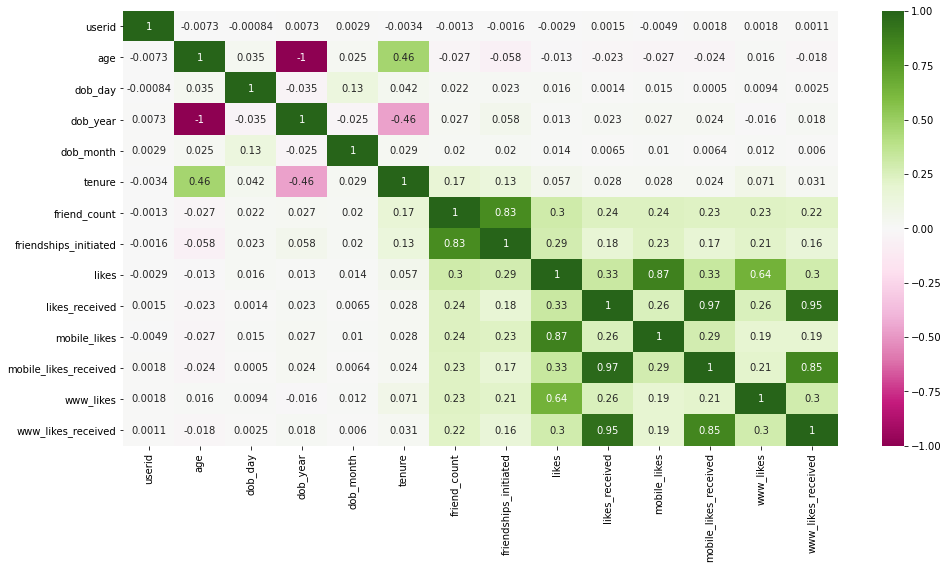

In [44]:

plt.figure(figsize=(16,8))
sns.heatmap(data.corr(),cmap='PiYG',annot=True)
# Friend count and friend initiated are linery co-related
# Can find the gender cause its is a categorical value which needs to be changed 

Answer-3

In [53]:
data['gender'].value_counts()

male      58749
female    40254
Name: gender, dtype: int64

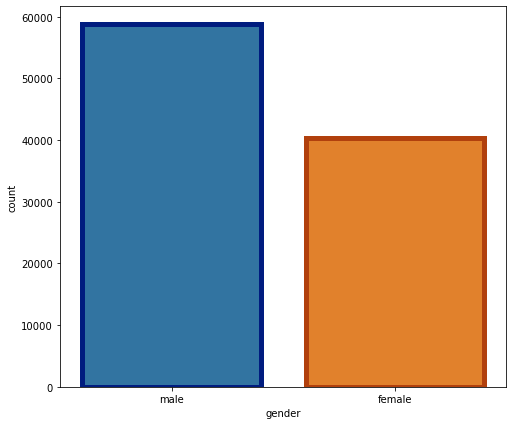

In [52]:
plt.figure(figsize=(8,7))
sns.countplot(x='gender',data=data,linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
# From the Graph we can say There are 58,749 males and 40,254 females 

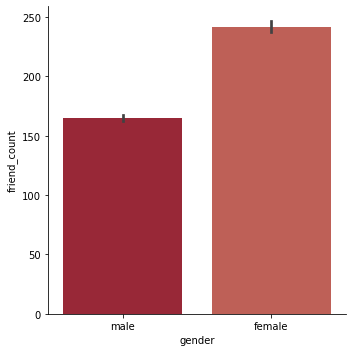

In [85]:
# 2nd 
sns.catplot(x='gender',y='friend_count',data=data,kind='bar',palette=sns.color_palette("RdBu",10))
# from the graph it is clear that female has more friends

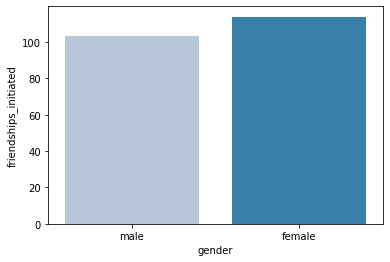

In [92]:
#3rd  More friendhsip are initiated by female
sns.barplot(x='gender',y='friendships_initiated',data=data,ci=None, palette="PuBu",orient='v')

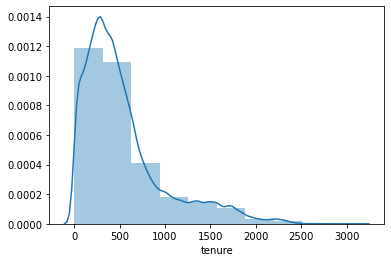

In [24]:
#4th 
sns.distplot(data['tenure'],bins=10)

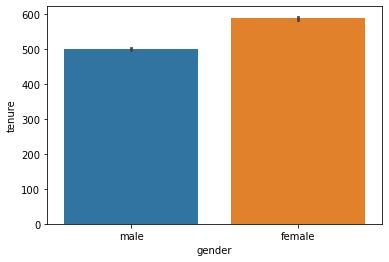

In [12]:
sns.barplot(x=data['gender'],y=data['tenure'],data=data)
# girls are using the facebook from a long time than 

In [12]:
#1. total 1962 users have no friends 
sum(data['friend_count']==0)


1962

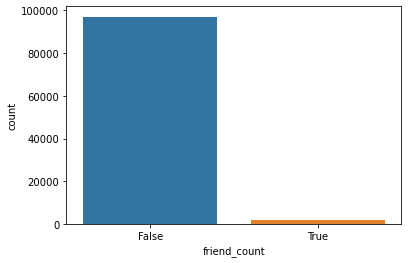

In [14]:
sns.countplot((data['friend_count']==0))

In [28]:
#2nd 22308 users did not like any post 
sum(data['likes']==0)

22308

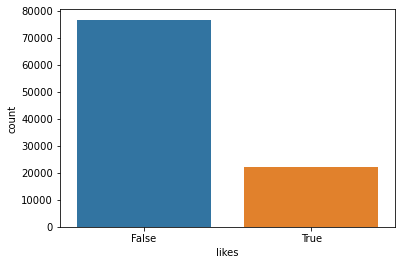

In [29]:
sns.countplot(data['likes']==0)

In [25]:
#3 total of 24,428 of users  did not receive any likes
sum(data['likes_received']==0)

24428

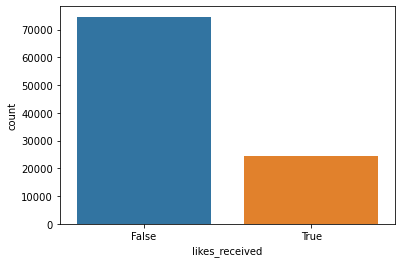

In [7]:
sns.countplot((data['likes_received']==0))


Answer-5

In [18]:
data['likes_received'].mean()

142.6893629485975

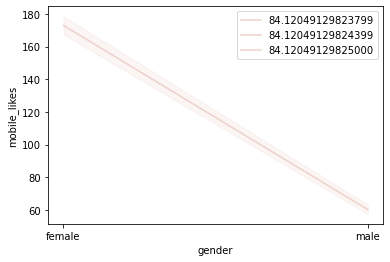

In [23]:
sns.lineplot(x='gender',y='mobile_likes',data=data,hue=data['mobile_likes_received'].mean())
#on an avg female users through web  are liking more pics (84)

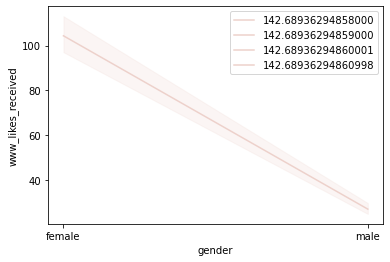

In [30]:
sns.lineplot(x='gender',y='www_likes_received',data=data,hue=data['likes_received'].mean())
#female users are using more in web vs app (142)